In [51]:
import pandas as pd
import re
import nltk
import string 

In [99]:
mbti= pd.read_csv('/Users/gonzaloalvarez/final_project/mbti.zip')

In [100]:
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


### Clean posts.

In [95]:
def clean_text(text):

    remove_urls= [re.sub(r'(http\S+| www\S+)',r'',l) for l in text]
    delete_separations=[re.sub(r'\|\|\|',r' ', l) for l in remove_urls]
    delete_ads=[re.sub(r'@\S+', r' ', l) for l in delete_separations]
    
    return delete_ads
    
mbti['cleaned_text']= mbti[['posts']].apply(clean_text)    

In [97]:
def remove_punctuation(text):
    
    text = ''.join([c for c in text if c not in string.punctuation])
    
    return text.lower()

mbti['cleaned_text']= mbti['cleaned_text'].apply(remove_punctuation)

In [ ]:
def get_type_index(string):
    
    return list(types).index(string)

mbti['type_index'] = mbti['type'].apply(get_type_index)

In [39]:
import matplotlib.pyplot as plt

In [40]:
mbti['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

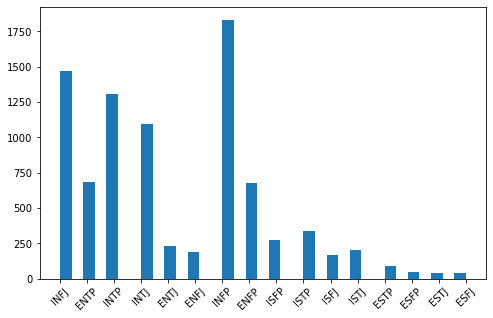

In [41]:
fig, ax= plt.subplots(figsize=(8,5))

ax= plt.hist(mbti['type'], bins=35)
plt.xticks(rotation= 45)
plt.show()

In [ ]:
mbti.to_csv('mbti_changed.csv', index=False)